# Cell Segmentation Analysis

In this notebook, we will perform cell segmentation on a microscopy image using the watershed algorithm. We will also calculate the average area of the segmented cells.

## Step 1: Load and Visualize the Image

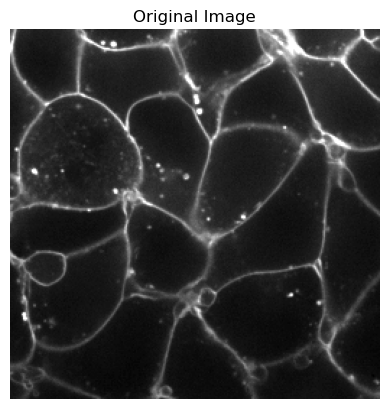

In [1]:
import matplotlib.pyplot as plt
from skimage import io

# Load image
image = io.imread('../data/membrane2d.png', as_gray=True)

# Display image
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

## Step 2: Enhance the Image Contrast and Apply Thresholding

We will improve the image contrast using a filter and apply a threshold to create a binary image.

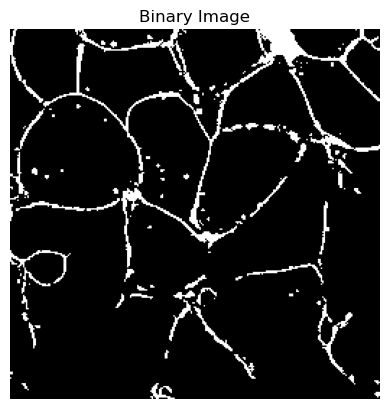

In [2]:
from skimage import filters, morphology

# Enhance contrast
image_enhanced = filters.rank.enhance_contrast(image, morphology.disk(3))

# Apply Otsu's threshold
binary = image_enhanced > filters.threshold_otsu(image_enhanced)

# Display result
plt.imshow(binary, cmap='gray')
plt.title('Binary Image')
plt.axis('off')
plt.show()

## Step 3: Compute the Distance Transform

Distance transform is computed on the binary image to help in identifying the cell centers.

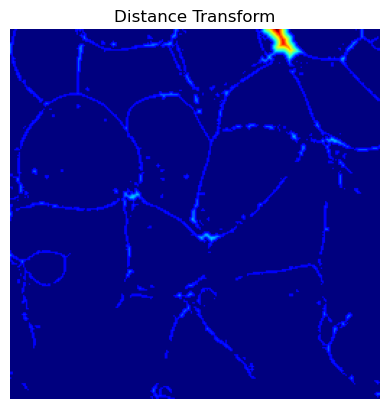

In [3]:
from scipy import ndimage as ndi

# Compute distance transform
distance = ndi.distance_transform_edt(binary)

# Display distance map
plt.imshow(distance, cmap='jet')
plt.title('Distance Transform')
plt.axis('off')
plt.show()

## Step 4: Apply Watershed Segmentation

We will apply the watershed algorithm to segment the cells.

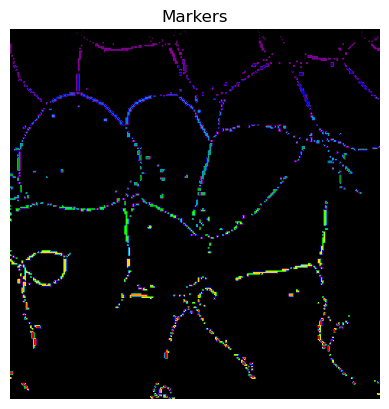

In [4]:
from skimage import feature, segmentation
import numpy as np

# Find local maxima
local_maxi = feature.peak_local_max(distance, footprint=np.ones((3, 3)), labels=binary, exclude_border=False)

# Create a markers image of the same shape as the input image
markers = np.zeros_like(distance, dtype=bool)
markers[tuple(local_maxi.T)] = True
markers, _ = ndi.label(markers)

# Display markers
plt.imshow(markers, cmap='nipy_spectral')
plt.title('Markers')
plt.axis('off')
plt.show()

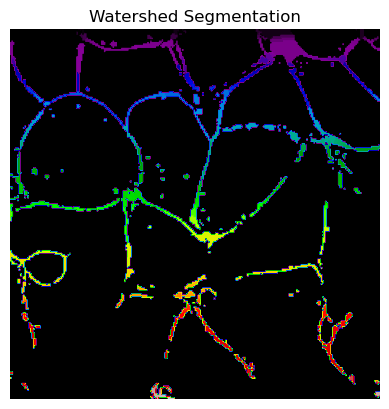

In [5]:
# Apply watershed
labels = segmentation.watershed(-distance, markers, mask=binary)

# Display segmented image
plt.imshow(labels, cmap='nipy_spectral')
plt.title('Watershed Segmentation')
plt.axis('off')
plt.show()

## Step 5: Measure the Average Area of Segmented Cells

Let's calculate and output the average area of the segmented cells.

In [6]:
from skimage import measure
import numpy as np

# Measure regions
props = measure.regionprops(labels)
areas = [prop.area for prop in props]
average_area = np.mean(areas)

print(f"Average cell area: {average_area:.2f} pixels")

Average cell area: 8.28 pixels
